# Embedding visualisation 

We are using the Barcelona dataset, and looking at the embedding of the images produced by DINOv2 model.

In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temp = torch.load("embedded_cells.pt")
embeddings, labels = temp["embeddings"], temp["labels"]
del temp

## Using t-SNE

In [3]:
from sklearn.manifold import TSNE

In [4]:
n = embeddings.shape[0]
X_tsne = TSNE(n_components=2).fit_transform(embeddings.view(n, -1))

In [5]:
import json

with open("label_translation.json", 'r') as label_dict:
    translation_dict = json.load(label_dict)

In [6]:
df_plot = pd.DataFrame([x + [translation_dict[str(int(label))]] for x, label in zip(X_tsne.tolist(), labels.tolist())], columns=["t_SNE1", "t_SNE2", "Cell_type"])
df_plot.head()

,t_SNE1,t_SNE2,Cell_type
0,-40.141468,22.433390,ig
1,2.046761,16.067940,eosinophil
2,28.083487,-16.683855,lymphocyte
3,-22.076340,-0.286261,eosinophil
4,-29.811129,14.215200,neutrophil


<Figure size 1200x1600 with 0 Axes>

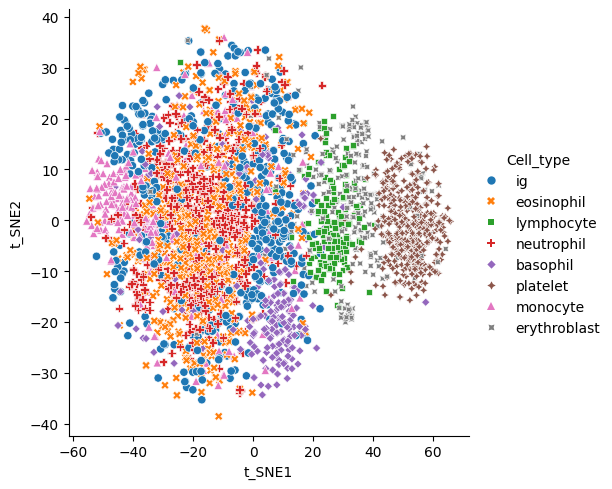

In [7]:
plt.figure(figsize=(12,16))
sns.relplot(
    data=df_plot.iloc[:3000],
    x="t_SNE1", y="t_SNE2", hue="Cell_type", style="Cell_type"
)
plt.show()

## Using UMAP

In [9]:
from umap import UMAP

umap_2d = UMAP(n_components=2, init='random', random_state=24)
X_umap = umap_2d.fit_transform(embeddings.view(n, -1))

df_plot = pd.DataFrame([x + [translation_dict[str(int(label))]] for x, label in zip(X_umap.tolist(), labels.tolist())], columns=["umap_1", "umap_2", "Cell_type"])
df_plot.head()

/home/etienneguevel/Documents/SCAI/OT4D/cell_similarity/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,umap_1,umap_2,Cell_type
0,2.864554,2.911034,ig
1,6.401455,5.135485,eosinophil
2,6.724053,1.313208,lymphocyte
3,6.926104,2.229732,eosinophil
4,6.073548,3.778292,neutrophil


<Figure size 1200x1600 with 0 Axes>

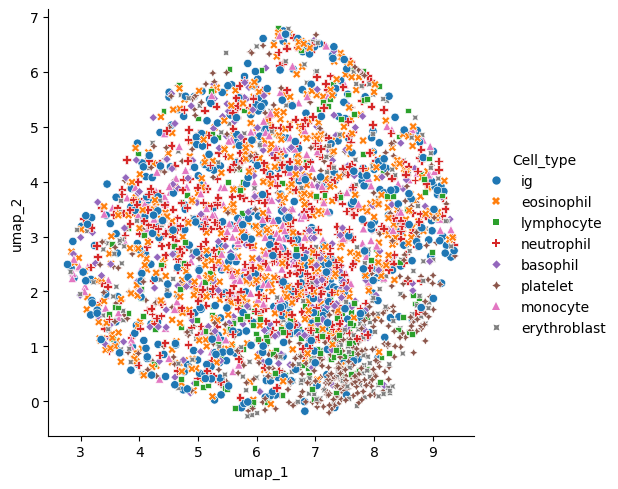

In [10]:
plt.figure(figsize=(12,16))
sns.relplot(
    data=df_plot.iloc[:3000],
    x="umap_1", y="umap_2", hue="Cell_type", style="Cell_type"
)
plt.show()

## PCA visualization

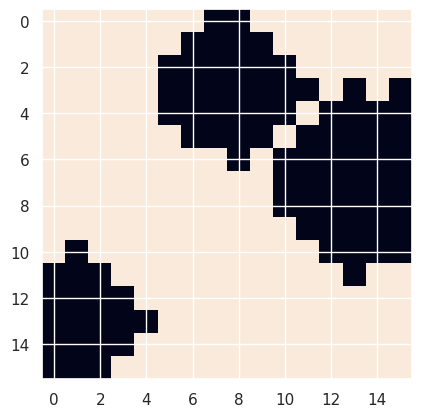

In [72]:
from sklearn.decomposition import PCA

im1 = embeddings[89,:,:]
pca = PCA(n_components=3)
pca_features = pca.fit_transform(im1)

# segment using the first component
pca_features_bg = pca_features[:, 0] < 10
pca_features_fg = ~pca_features_bg

# plot the pca_features_bg
plt.imshow(pca_features_bg.reshape(16, 16))
plt.show()

In [73]:
# PCA for only foreground patches
pca.fit(im1[pca_features_fg]) # NOTE: I forgot to add it in my original answer
pca_features_rem = pca.transform(im1[pca_features_fg])

# transform using mean and std, I personally found this transformation gives a better visualization
pca_features_rem[:, i] = (pca_features_rem[:, i] - pca_features_rem[:, i].mean()) / (pca_features_rem[:, i].std() ** 2) + 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


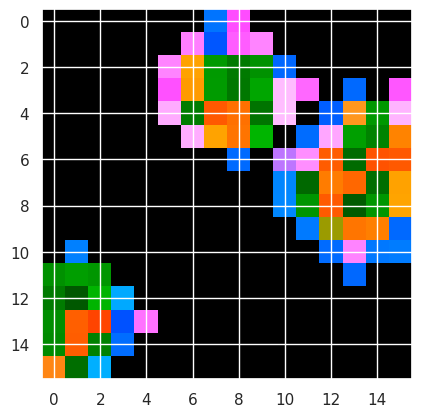

In [74]:
pca_features_rgb = pca_features.copy()
pca_features_rgb[pca_features_bg] = 0
pca_features_rgb[pca_features_fg] = pca_features_rem

pca_features_rgb = pca_features_rgb.reshape(1, 16, 16, 3)

plt.imshow(pca_features_rgb[0][..., ::-1])
plt.show()